In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(49.19532048937211, -145.91426092595592),
 (-67.86012897433608, 80.44263275073064),
 (-30.898959807310987, 0.4856722888834213),
 (-80.44214243570208, -169.05985660368694),
 (-48.0885020292731, 56.54455866868636),
 (-15.899596379949244, -7.1564161266647375),
 (26.11828128622939, -91.7409501853223),
 (85.60103994117642, 126.70855956406677),
 (50.507524592568416, 101.55968854414738),
 (-27.88884185898005, 103.6379861421529),
 (-53.418935987077155, -76.2232994159109),
 (72.30063495850848, 6.470471333787231),
 (82.51640154718922, -84.66071358204644),
 (60.493606509354606, -85.14274849016168),
 (27.071257490350035, 49.403223106270275),
 (59.50573938643734, -60.13493518536302),
 (22.66704124612005, 2.4148856995157075),
 (-46.1117519881666, -68.70846108946373),
 (29.913859155770098, -113.26692506776793),
 (27.67023931879467, -4.267958381965684),
 (84.45503529520104, 53.22651329595476),
 (75.55990499300316, 46.05799199535406),
 (46.74829415324501, 65.04723529299343),
 (-66.15995524665877, 149.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | taltal
Processing Record 2 of Set 12 | sigli
Processing Record 3 of Set 12 | saint george
Processing Record 4 of Set 12 | kavieng
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 12 | new norfolk
Processing Record 8 of Set 12 | juneau
Processing Record 9 of Set 12 | busselton
Processing Record 10 of Set 12 | chicama
Processing Record 11 of Set 12 | keti bandar
Processing Record 12 of Set 12 | koumac
Processing Record 13 of Set 12 | tarime
Processing Record 14 of Set 12 | mataura
Processing Record 15 of Set 12 | hermanus
Processing Record 16 of Set 12 | port alfred
Processing Record 17 of Set 12 | bluff
Processing Record 18 of Set 12 | caravelas
Processing Record 19 of Set 12 | huntington
Processing Record 20 of Set 12 | hilo
Processing Record 21 of Set 12 | georgetown
Processing Record 22 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 23 of

Processing Record 38 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 39 of Set 15 | maniitsoq
Processing Record 40 of Set 15 | wanaka
Processing Record 41 of Set 15 | severo-kurilsk
Processing Record 42 of Set 15 | jamestown
Processing Record 43 of Set 15 | san carlos de bariloche
Processing Record 44 of Set 15 | virginia beach
Processing Record 45 of Set 15 | dasoguz
Processing Record 46 of Set 15 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 15 | smolensk
Processing Record 48 of Set 15 | hurghada
Processing Record 49 of Set 15 | port elizabeth
Processing Record 50 of Set 15 | tekeli
Processing Record 1 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 16 | luangwa
Processing Record 3 of Set 16 | vardo
Processing Record 4 of Set 16 | buala
Processing Record 5 of Set 16 | arman
Processing Record 6 of Set 16 | ostrovnoy
Processing Record 7 of Set 16 | belyy yar
Processing Record 8 of Set 16 | avera
Proce

Processing Record 20 of Set 19 | chapais
Processing Record 21 of Set 19 | ilula
Processing Record 22 of Set 19 | aykhal
Processing Record 23 of Set 19 | birao
Processing Record 24 of Set 19 | kalmunai
Processing Record 25 of Set 19 | abu kamal
Processing Record 26 of Set 19 | solnechnyy
Processing Record 27 of Set 19 | piacabucu
Processing Record 28 of Set 19 | marshall
Processing Record 29 of Set 19 | lavrentiya
Processing Record 30 of Set 19 | plettenberg bay
Processing Record 31 of Set 19 | oranjestad
Processing Record 32 of Set 19 | arraial do cabo
Processing Record 33 of Set 19 | birjand
Processing Record 34 of Set 19 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 19 | fairhaven
Processing Record 36 of Set 19 | vincennes
Processing Record 37 of Set 19 | necochea
Processing Record 38 of Set 19 | hofn
Processing Record 39 of Set 19 | prince rupert
Processing Record 40 of Set 19 | sisimiut
Processing Record 41 of Set 19 | atambua
Processing Record 42 of Set 19 | 

Processing Record 8 of Set 23 | yokadouma
Processing Record 9 of Set 23 | astana
Processing Record 10 of Set 23 | okhtyrka
Processing Record 11 of Set 23 | khasan
Processing Record 12 of Set 23 | wodonga
Processing Record 13 of Set 23 | mandera
Processing Record 14 of Set 23 | ekhabi
Processing Record 15 of Set 23 | beroroha
Processing Record 16 of Set 23 | thinadhoo
Processing Record 17 of Set 23 | antofagasta
Processing Record 18 of Set 23 | merrill
Processing Record 19 of Set 23 | rundu
Processing Record 20 of Set 23 | xining
Processing Record 21 of Set 23 | ejido
Processing Record 22 of Set 23 | heidelberg
Processing Record 23 of Set 23 | nouadhibou
Processing Record 24 of Set 23 | port hardy
Processing Record 25 of Set 23 | solovetskiy
City not found. Skipping...
Processing Record 26 of Set 23 | jagalur
Processing Record 27 of Set 23 | point pleasant
Processing Record 28 of Set 23 | nogliki
Processing Record 29 of Set 23 | kloulklubed
Processing Record 30 of Set 23 | muskegon
Proc

In [18]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,67.32,61,8,3.78,CL,2021-06-11 18:21:29
1,Sigli,5.3848,95.9609,79.07,79,100,3.67,ID,2021-06-11 18:21:30
2,Saint George,37.1041,-113.5841,85.35,9,1,1.01,US,2021-06-11 18:19:13
3,Kavieng,-2.5744,150.7967,81.77,80,24,15.84,PG,2021-06-11 18:21:30
4,Ushuaia,-54.8000,-68.3000,40.66,75,0,1.14,AR,2021-06-11 18:21:30
5,New Norfolk,-42.7826,147.0587,56.66,85,100,1.01,AU,2021-06-11 18:21:31
6,Juneau,58.3019,-134.4197,55.45,88,90,0.00,US,2021-06-11 18:21:31
7,Busselton,-33.6500,115.3333,53.10,84,87,3.96,AU,2021-06-11 18:21:31
8,Chicama,-7.8447,-79.1469,66.74,63,18,10.04,PE,2021-06-11 18:21:31
9,Keti Bandar,24.1447,67.4497,84.92,78,1,19.46,PK,2021-06-11 18:21:32


In [19]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2021-06-11 18:21:29,-25.4000,-70.4833,67.32,61,8,3.78
1,Sigli,ID,2021-06-11 18:21:30,5.3848,95.9609,79.07,79,100,3.67
2,Saint George,US,2021-06-11 18:19:13,37.1041,-113.5841,85.35,9,1,1.01
3,Kavieng,PG,2021-06-11 18:21:30,-2.5744,150.7967,81.77,80,24,15.84
4,Ushuaia,AR,2021-06-11 18:21:30,-54.8000,-68.3000,40.66,75,0,1.14
5,New Norfolk,AU,2021-06-11 18:21:31,-42.7826,147.0587,56.66,85,100,1.01
6,Juneau,US,2021-06-11 18:21:31,58.3019,-134.4197,55.45,88,90,0.00
7,Busselton,AU,2021-06-11 18:21:31,-33.6500,115.3333,53.10,84,87,3.96
8,Chicama,PE,2021-06-11 18:21:31,-7.8447,-79.1469,66.74,63,18,10.04
9,Keti Bandar,PK,2021-06-11 18:21:32,24.1447,67.4497,84.92,78,1,19.46


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

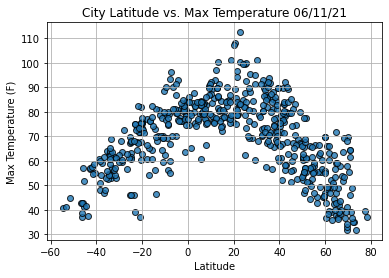

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

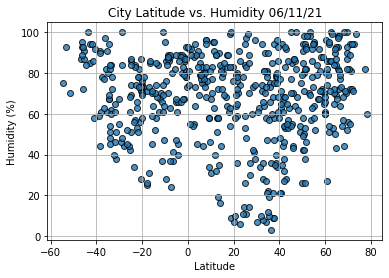

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

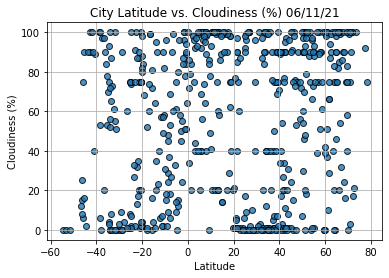

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

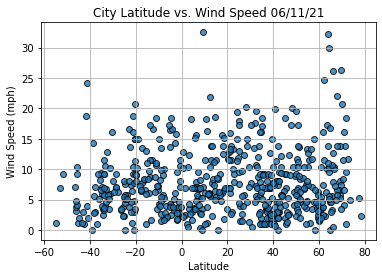

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sigli,ID,2021-06-11 18:21:30,5.3848,95.9609,79.07,79,100,3.67
2,Saint George,US,2021-06-11 18:19:13,37.1041,-113.5841,85.35,9,1,1.01
6,Juneau,US,2021-06-11 18:21:31,58.3019,-134.4197,55.45,88,90,0.00
9,Keti Bandar,PK,2021-06-11 18:21:32,24.1447,67.4497,84.92,78,1,19.46
17,Huntington,US,2021-06-11 18:21:34,38.4193,-82.4452,84.45,79,90,1.99


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

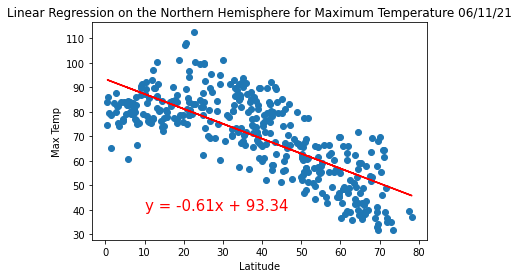

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere for Maximum Temperature "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


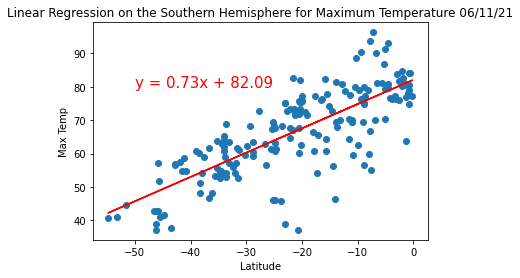

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere for Maximum Temperature "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

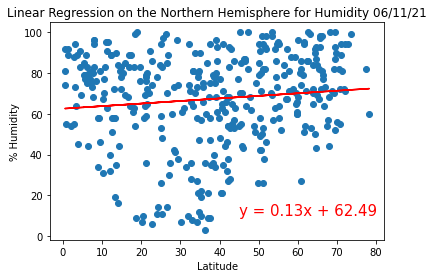

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere for Humidity "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

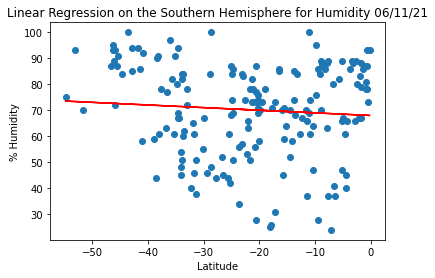

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere for Humidity "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

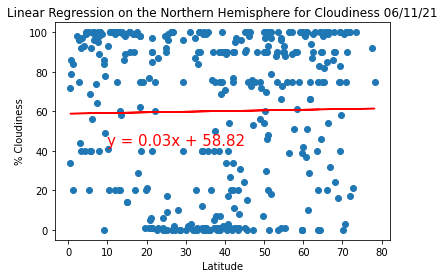

In [37]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere for Cloudiness "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,43))

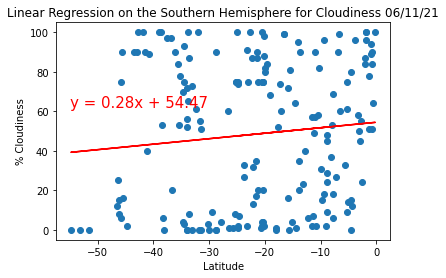

In [38]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere for Cloudiness "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,62))

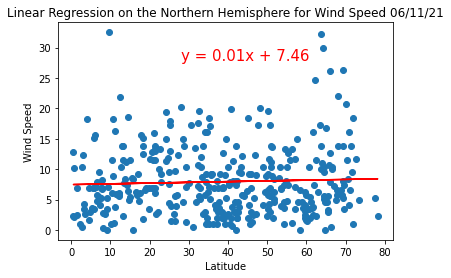

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(28,28))

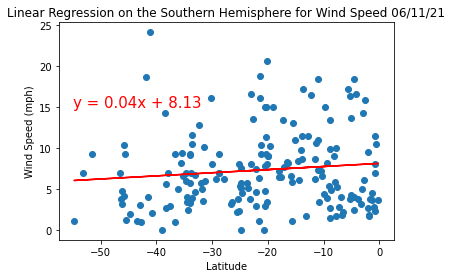

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed "+ time.strftime("%x"))
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-55,15))